In [1]:
pip install ultralytics opencv-python

   ---------------------------------------- 0.0/978.8 kB ? eta -:--:--
   --------------------------------------- 978.8/978.8 kB 15.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.6/39.5 MB 12.6 MB/s eta 0:00:03
   ---- ----------------------------------- 4.7/39.5 MB 11.4 MB/s eta 0:00:04
   ------ --------------------------------- 6.3/39.5 MB 10.4 MB/s eta 0:00:04
   ------- -------------------------------- 7.9/39.5 MB 9.4 MB/s eta 0:00:04
   --------- ------------------------------ 9.2/39.5 MB 9.2 MB/s eta 0:00:04
   ---------- ----------------------------- 10.5/39.5 MB 8.6 MB/s eta 0:00:04
   ------------ --------------------------- 12.1/39.5 MB 8.3 MB/s eta 0:00:04
   ------------- -------------------------- 13.6/39.5 MB 8.1 MB/s eta 0:00:04
   --------------- ------------------------ 15.2/39.5 MB 8.2 MB/s eta 0:00:03
   ---------------- ----------------------- 16.5/39.5 MB 8.0 MB/s eta 0:00:03
 

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 pre-trained model (you can use yolov8n, yolov8s, yolov8m, etc.)
model = YOLO('yolov8n.pt')  # yolov8n is the smallest & fastest

100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 8.74MB/s]


In [2]:
# Thresholds for traffic classification
def classify_traffic(vehicle_count):
    if vehicle_count <= 5:
        return "Low"
    elif vehicle_count <= 15:
        return "Medium"
    else:
        return "High"

In [3]:
# Load and predict on a static image
image_path = 'D:/TrafficFlow-AI/test.jpg'  # Replace with your image path
image = cv2.imread(image_path)
results = model(image)

# Count vehicles: filter relevant classes (car=2, motorbike=3, bus=5, truck=7)
vehicle_classes = [2, 3, 5, 7]
vehicle_count = sum(int(box.cls) in vehicle_classes for box in results[0].boxes)


0: 384x640 30 cars, 8 trucks, 129.9ms
Speed: 5.2ms preprocess, 129.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


In [4]:
# Classify traffic level
traffic_level = classify_traffic(vehicle_count)
print(f"Detected {vehicle_count} vehicles → Traffic Level: {traffic_level}")

Detected 38 vehicles → Traffic Level: High


In [5]:
# Draw bounding boxes
annotated_image = results[0].plot()  # YOLOv8 handles drawing

# Add traffic level text on the image
cv2.putText(annotated_image, f"Traffic Level: {traffic_level}", (30, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)

array([[[118, 118, 118],
        [114, 114, 114],
        [108, 108, 108],
        ...,
        [  0, 237, 204],
        [  0, 237, 204],
        [  0, 237, 204]],

       [[114, 114, 114],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [  0, 237, 204],
        [  0, 237, 204],
        [  0, 237, 204]],

       [[108, 108, 108],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [  0, 237, 204],
        [  0, 237, 204],
        [  0, 237, 204]],

       ...,

       [[157, 165, 169],
        [155, 163, 166],
        [154, 162, 165],
        ...,
        [141, 144, 143],
        [140, 142, 142],
        [140, 142, 142]],

       [[156, 164, 167],
        [155, 163, 166],
        [154, 162, 165],
        ...,
        [141, 144, 143],
        [140, 142, 142],
        [139, 141, 141]],

       [[155, 163, 166],
        [154, 162, 165],
        [153, 161, 164],
        ...,
        [142, 145, 144],
        [140, 142, 142],
        [138, 140, 140]]

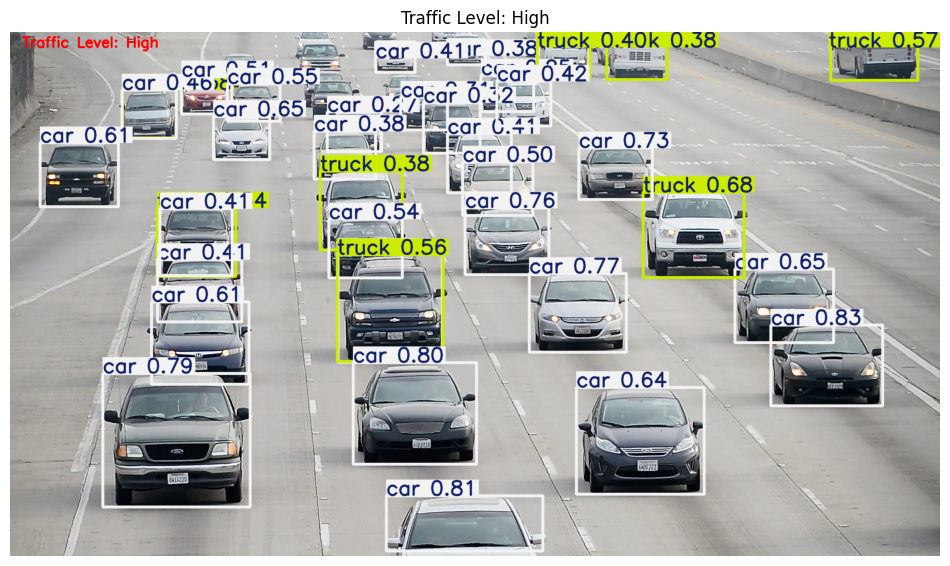

In [6]:
# Display the image using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Traffic Level: {traffic_level}")
plt.show()